# Agrupamento Hierárquico

***

Agrupamento hierárquico é uma alternativa que não requer
uma escolha pré-definida de K, e que provê uma saída
determinística (sem aleatoriedade)

In [1]:
# Bibliotecas de manipualção e visualização de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Classes do modelo
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram
import collections

import warnings
warnings.filterwarnings('ignore')

## Conjunto de dados

In [2]:
#carregando o csv
dataset = pd.read_csv("https://raw.githubusercontent.com/Francimaria/especializacao_DNN/main/datasets/Iris.csv")

In [3]:
# Vamos utilizar apenas duas features para facilitar a visualização
feature_0 = "PetalLengthCm"
feature_1 = "PetalWidthCm"

X = dataset.iloc[:,[2,3]]

## Definindo o modelo 

[Agglomerative Clustering](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering).

Mescla recursivamente pares de clusters de dados de amostra; usa a distância de linkage (A dissimilaridade entre dois grupos).

Alguns parâmetros podem ser ajustados: 

'n_clusters': Número de agrupamentos. Pode receber um valor inteiro ou None.

'metric': Métrica usada para calcular o linkage. Métricas usadas:  'euclidean', 'l1', 'l2', 'manhattan', 'cosine', or 'precomputed'. Se 'n_clusters" for None a distância Euclideana será usada.

'linkage': Tipo de linkage usado. Pode ser: ‘ward’, ‘complete’, ‘average’, ‘single’

A documentação possui a descrição dos demais parâmetros.

In [4]:
model = AgglomerativeClustering(n_clusters=3)
model.fit(X)
labels = model.labels_

In [5]:
model.get_params()

{'affinity': 'deprecated',
 'compute_distances': False,
 'compute_full_tree': 'auto',
 'connectivity': None,
 'distance_threshold': None,
 'linkage': 'ward',
 'memory': None,
 'metric': None,
 'n_clusters': 3}

In [6]:
collections.Counter(labels)

Counter({0: 54, 1: 50, 2: 46})

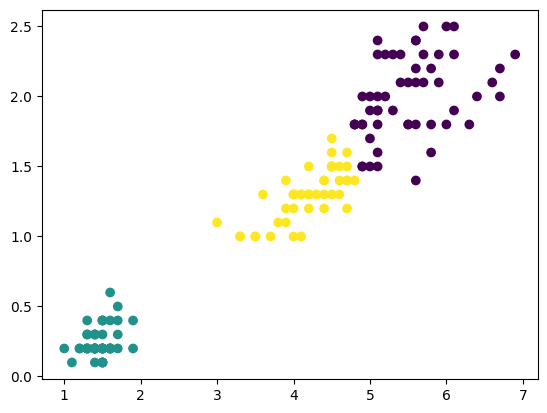

In [7]:
plt.scatter(X[feature_0], X[feature_1], c=labels)
plt.show()

## Para visualizar os resultados, pode-se usar um **dendograma**

Segue o link para documentação [link](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html).



In [8]:
# Método para visualização
def plot_dendrogram(model, **kwargs):
    # Primeiramente vamos criar a linkage matriz e então plotar o dendograma

    # criando a contagem the exemplos abaixo de cada nó
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # nó da folha
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot o dendograma correspondente 
    dendrogram(linkage_matrix, **kwargs)

**o eixo y do dendograma é (proporcional) a distância entre os grupos que foram combinados**

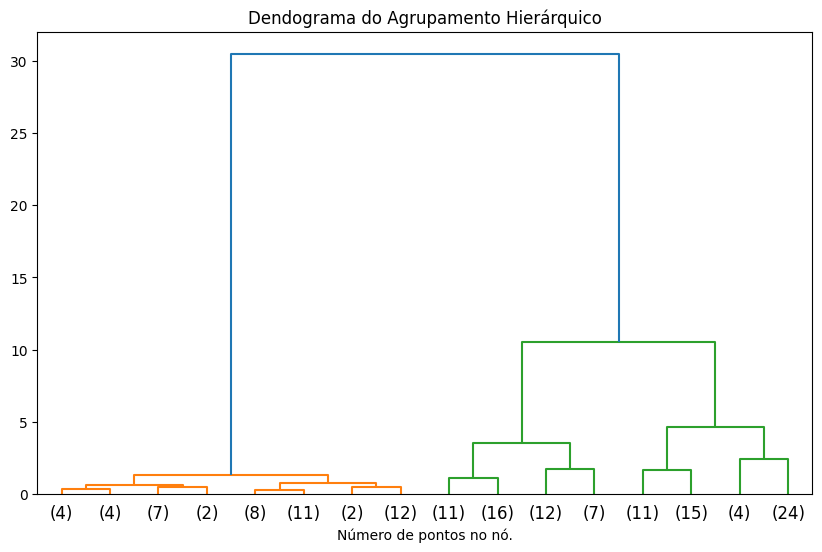

In [9]:
# Alguns parâmetros precisam receber determinados valores para mostrar a árvore completa
model = AgglomerativeClustering(n_clusters=None,distance_threshold=0, compute_full_tree=True)
model = model.fit(X)
plt.figure(figsize=(10, 6))
plt.title("Dendograma do Agrupamento Hierárquico")

# Plotando o top 3 níveis do dendograma
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Número de pontos no nó.")
#plt.axhline(y=10, color='red')
plt.show()